In [1]:
# import done here
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

from IPython.display import display

### Loading the Dataset
---

In [2]:
# LOAD THE DATASET INTO PANDAS DATAFRAME:
datadir = '/Users/sam/All-Program/App-DataSet/Study/Crime-Prediction/communities-crime-clean.csv'

crimeDF = pd.read_csv(datadir, sep=',', header='infer')

# Displaying first five elements for all the columns
print (crimeDF.shape)
with pd.option_context('display.max_columns', None):
    display(crimeDF.head())
    
# Important feature variables
nonPredictiveFeatures = ['state','communityname','fold']
regTargetVar = ['ViolentCrimesPerPop']
classTargetVar = ['highCrime']

(1993, 104)


,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,0.02,1.0,0.46,0.77,0.23,0.38,0.22,0.16,0.22,0.42,0.29,0.29,0.27,0.16,0.24,0.38,0.26,0.01,0.14,0.27,0.37,0.39,0.12,0.69,0.27,0.37,0.32,0.48,0.31,0.20,0.35,0.34,0.56,0.81,0.79,0.97,0.82,0.60,0.51,0.00,0.09,0.00,0.50,0.43,0.46,0.43,0.04,0.03,0.03,0.02,0.97,0.01,0.17,0.21,0.65,0.64,0.56,0.82,0.10,0.22,0.5,0.01,0.85,0.82,0.00,0.26,0.83,0.13,0.66,0.16,0.15,0.13,0.13,0.23,0.25,0.28,0.19,0.18,0.25,0.00,0.00,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,0.00,0.0,0.15,0.33,0.13,0.27,0.65,0.41,0.45,0.21,0.22,0.29,0.15,0.00,0.29,0.00,0.14,0.02,0.45,0.57,0.70,0.21,0.27,0.43,1.00,0.17,0.93,0.24,0.42,0.32,0.54,0.52,0.46,0.48,0.43,0.48,0.59,0.81,0.82,0.02,0.42,0.00,0.00,0.78,0.64,0.54,0.00,0.02,0.01,0.01,0.98,0.02,0.19,0.18,0.43,0.43,0.42,0.58,0.17,0.46,0.5,0.02,0.73,0.58,0.18,0.40,0.56,0.55,0.48,0.06,0.06,0.08,0.02,0.07,0.08,0.09,0.20,0.16,0.36,0.00,0.00,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,0.04,1.0,0.12,0.32,0.19,0.28,0.67,0.52,0.57,0.18,0.21,0.35,0.15,0.26,0.18,0.84,0.33,0.06,0.65,0.48,0.58,0.28,0.79,0.22,0.44,0.43,0.54,0.41,0.69,0.36,0.67,0.71,0.42,0.28,0.24,0.38,0.27,0.49,0.49,0.04,0.55,0.00,0.22,0.28,0.45,0.40,0.02,0.02,0.03,0.03,0.95,0.02,0.25,0.22,0.36,0.34,0.41,0.50,0.13,0.51,0.5,0.07,0.56,0.52,0.31,0.60,0.40,0.55,0.33,0.05,0.07,0.09,0.02,0.09,0.13,0.13,0.41,0.38,0.47,0.01,0.02,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,0.00,0.0,0.23,0.43,0.48,0.36,0.53,0.41,0.44,0.29,0.27,0.30,0.18,0.19,0.20,0.00,0.80,0.02,0.38,0.51,0.59,0.32,0.37,0.43,0.64,0.30,0.52,0.46,0.47,0.31,0.42,0.46,0.43,0.63,0.62,0.66,0.53,0.51,0.47,0.01,0.22,0.00,0.41,0.30,0.29,0.65,0.04,0.02,0.02,0.04,0.96,0.02,0.19,0.18,0.38,0.43,0.32,0.58,0.12,0.45,0.5,0.03,0.66,0.55,0.18,0.26,0.58,0.42,0.41,0.10,0.10,0.12,0.08,0.14,0.15,0.15,0.24,0.17,0.33,0.00,0.00,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,0.05,1.0,0.02,0.77,0.57,0.47,0.13,0.11,0.16,0.32,0.17,0.19,0.16,0.07,0.21,0.14,0.22,0.11,1.00,0.18,0.18,0.82,0.42,0.23,0.19,1.00,0.25,0.67,0.09,1.00,0.16,0.13,0.38,0.55,0.53,0.59,0.54,0.68,0.69,0.03,0.69,0.01,1.00,0.91,0.86,0.80,0.29,0.23,0.20,0.17,0.90,0.05,0.14,0.07,0.25,0.41,0.22,0.24,0.14,0.71,0.0,0.06,0.66,0.21,0.07,0.24,0.77,0.27,0.10,0.16,0.16,0.18,0.18,0.21,0.26,0.21,1.00,0.16,0.24,0.00,0.00,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15


In [3]:
# The cross validation Random state to be used is for all the model is;
cv = model_selection.ShuffleSplit(n_splits=10,random_state=675) 

# 1. Decision Trees:
----

### Part (a):
Create a new field “highCrime” which is true if the crime rate per capita (ViolentCrimesPerPop) is greater than 0.1, and false otherwise. What are the percentage of positive and negative instances in the dataset?

Solutions: The percentage of positive instances is 62.72 and the percentage of negative insances is 37.28

In [4]:
crimeDF['highCrime'] = crimeDF['ViolentCrimesPerPop'] > 0.1
print ('The shape after adding the classification column is; ', crimeDF.shape)
percntgPositive = (sum(crimeDF['highCrime'] == True)/ (sum(crimeDF['highCrime'] == True) + sum(crimeDF['highCrime'] == False))) * 100
percntgNegative = 100-percntgPositive
print ('Percent of positive instancs are %f and percent of negative instances are %f '%(percntgPositive, percntgNegative))

The shape after adding the classification column is;  (1993, 105)
Percent of positive instancs are 62.719518 and percent of negative instances are 37.280482 


In [5]:
print (crimeDF.shape)
crimeDF.head()

(1993, 105)


,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06,False
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14,True
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00,True
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23,True
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15,True


### Part (b):

Data Preparation:

In [6]:
# converting the label into proper binary labels
lb = preprocessing.LabelBinarizer()

# Remove the non-predictive and the target column form the data
dataContinuous = crimeDF.drop(nonPredictiveFeatures+regTargetVar+classTargetVar, 1)  
# Convert the target column into binomial label vector
targetBinomial = lb.fit_transform(crimeDF['highCrime']).flatten()      

print ('The shape of dataForDT after preprocessing is: ', dataContinuous.shape)
print ('The shape of targetForDT after preprocessing is: ', targetBinomial.shape)
# print (dataForDT)
print (targetBinomial)
dataContinuous.head()

The shape of dataForDT after preprocessing is:  (1993, 100)
The shape of targetForDT after preprocessing is:  (1993,)
[0 1 1 ..., 1 1 0]


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,...,0.00,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0
1,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,...,0.00,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0
2,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,...,0.02,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0
3,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,...,0.00,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0
4,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,...,0.00,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0


i. What are the training accuracy, precision, and recall for this tree? 

Solution: 

Accuracy = 1.0, Precision = 1.0, Recall = 1.0

In [7]:
# Fitting Decision tree classifier:
classifierDT = tree.DecisionTreeClassifier()
classifierDT = classifierDT.fit(dataContinuous, targetBinomial)

# Predict on the training Data
predForDT = classifierDT.predict(dataContinuous)

In [8]:
# Calculate Precision and Recall
cnfMatrix = pd.crosstab(targetBinomial, predForDT)
cnfMatrix
tpDT =  cnfMatrix.iloc[1][1]
tnDT =  cnfMatrix.iloc[0][0]
fpDT =  cnfMatrix.iloc[0][1]
fnDT =  cnfMatrix.iloc[1][0]
print ('The accuracy of the decision tree classifier is: ', (tpDT+tnDT)/(tpDT+tnDT+fpDT+fnDT))
print ('The precision of the decision tree classifier is: ', tpDT/(tpDT+fpDT))
print ('The recall of the decision tree classifier is: ', tpDT/(tpDT+fnDT))
# cnfMatrix.iloc[0][0] + cnfMatrix.iloc[1][1]/(cnfMatrix.iloc[0][0] + cnfMatrix.iloc[1][1] + cnfMatrix.iloc[0][0] + cnfMatrix.iloc[1][1])
cnfMatrix

The accuracy of the decision tree classifier is:  1.0
The precision of the decision tree classifier is:  1.0
The recall of the decision tree classifier is:  1.0


col_0,0,1
row_0,,
0,743,0
1,0,1250


ii. What are the main features used for classification? Can you explain why they make sense (or not)?

Solution: 

PctKids2Par : percentage of kids in family housing with two parents

racePctWhite :

PctLess9thGrade: percentage of people 25 and over with less than a 9th grade education

PctEmplManu : percentage of people 16 and over who are employed in manufacturing

blackPerCap : per capita income for african americans

In [9]:
# Get the best Fetures: Information gain with GINI
ImpfeatureDF = pd.DataFrame(columns=['feature_name', 'infoGain'])
featureVec = np.array(dataContinuous.columns)
ImpfeatureDF['feature_name'] = np.array(dataContinuous.columns)
# print (featureVec)
ImpfeatureDF['infoGain'] = classifierDT.feature_importances_

print ('The Top 5 features selected by decision tree are: ')
ImpfeatureDF.sort_values('infoGain', ascending=False).head(10)

The Top 5 features are selected by decision tree is: 


,feature_name,infoGain
44,PctKids2Par,0.358652
3,racePctWhite,0.088817
5,racePctHisp,0.048585
29,PctLess9thGrade,0.023864
34,PctEmplManu,0.021210
22,blackPerCap,0.015154
62,PctLargHouseFam,0.014203
73,PctHousOwnOcc,0.013686
78,PctWOFullPlumb,0.013076
55,PctImmigRec10,0.011994


### Part (c):

i. What are the 10-fold cross-validation accuracy, precision, and recall?

Solutions: mean n-fold Accuracy = 0.7735, mean n-fold Precision = 0.802457540816 and mean Recall = 0.827406078072

In [10]:
# import random
# random.seed(3213)
classifierDT = tree.DecisionTreeClassifier()

nfoldACC = model_selection.cross_val_score(classifierDT, dataContinuous, targetBinomial, cv=cv, scoring='accuracy')
nfoldPrecision = model_selection.cross_val_score(classifierDT, dataContinuous, targetBinomial, cv=cv, scoring='precision')
nfoldRecall = model_selection.cross_val_score(classifierDT, dataContinuous, targetBinomial, cv=cv, scoring='recall')

print ('The 10 Fold accuracy of the decision tree classifier is %s and their mean is : '%(str(nfoldACC)), np.mean(nfoldACC))
print ('The 10 Fold precision of the decision tree classifier is %s and their mean is : '%(str(nfoldPrecision)), np.mean(nfoldPrecision))
print ('The 10 Fold recall of the decision tree classifier is %s and their mean is : '%(str(nfoldRecall)), np.mean(nfoldRecall))

The 10 Fold accuracy of the decision tree classifier is [ 0.755  0.76   0.79   0.765  0.74   0.765  0.785  0.78   0.795  0.8  ] and their mean is :  0.7735
The 10 Fold precision of the decision tree classifier is [ 0.80314961  0.80487805  0.85365854  0.83193277  0.76744186  0.76153846
  0.77304965  0.81538462  0.81679389  0.79674797] and their mean is :  0.802457540816
The 10 Fold recall of the decision tree classifier is [ 0.8         0.84745763  0.81395349  0.73015873  0.85470085  0.81034483
  0.86885246  0.87903226  0.86614173  0.8034188 ] and their mean is :  0.827406078072


ii. Why are they different from the results in the previous test?

Solution:
In the first Decision Tree fit, since we fit on the whole dataset, the tree learned the entire data and made very good classification with 100% accuracy, precision and recall. This states that the previous method is prone to overfitting and may not generalize well for a new data. As data are always noisy. In the current model since we do crossvalidation we train on separate data and test on separate data. Thw model doesnt perform very well on the rest data and hence the accuracy. precision and recall of the model decreases.

# 2. Linear Classification:
-----

### Part (a) :-  GaussianNB

i. What is the 10-fold cross-validation accuracy, precision, and recall for this method?

Solutions: mean n-fold Accuracy = 0.7865, mean n-fold Precision = 0.930803183479 and mean Recall = 0.703736494399

In [61]:
from sklearn.naive_bayes import GaussianNB
classifierGNB = GaussianNB()
# classifierGNB.fit()

nfoldACC = model_selection.cross_val_score(classifierGNB, dataContinuous, targetBinomial, cv=cv, scoring='accuracy')
nfoldPrecision = model_selection.cross_val_score(classifierGNB, dataContinuous, targetBinomial, cv=cv, scoring='precision')
nfoldRecall = model_selection.cross_val_score(classifierGNB, dataContinuous, targetBinomial, cv=cv, scoring='recall')

print ('The 10 Fold accuracy of the gaussian naive bayes classifier is %s and their mean is : '%(str(nfoldACC)), np.mean(nfoldACC))
print ('The 10 Fold precision of the gaussian naive bayes classifier is %s and their mean is : '%(str(nfoldPrecision)), np.mean(nfoldPrecision))
print ('The 10 Fold recall of the gaussian naive bayes classifier is %s and their mean is : '%(str(nfoldRecall)), np.mean(nfoldRecall))

The 10 Fold accuracy of the gaussian naive bayes classifier is [ 0.785  0.795  0.745  0.77   0.795  0.785  0.825  0.805  0.78   0.78 ] and their mean is :  0.7865
The 10 Fold precision of the gaussian naive bayes classifier is [ 0.96590909  0.93258427  0.90625     0.95454545  0.90425532  0.96202532
  0.93939394  0.91262136  0.94623656  0.88421053] and their mean is :  0.930803183479
The 10 Fold recall of the gaussian naive bayes classifier is [ 0.68        0.70338983  0.6744186   0.66666667  0.72649573  0.65517241
  0.76229508  0.75806452  0.69291339  0.71794872] and their mean is :  0.703736494399


ii. What are the 10 most predictive features? This can be measured by the normalized absolute difference of means for the feature between the two classes:

Solution: The 10 most predictive features are given below.

In [69]:
indexClassNo = np.where(targetBinomial==0)[0]
indexClassYes = np.where(targetBinomial==1)[0]
# print (indexClassYes)

NBfeauturePredictivePower = pd.DataFrame(columns=['feature_name','PredictivePower','NegPos-Coefficient'])
NBfeauturePredictivePower['feature_name'] = np.array(dataContinuous.columns)

for num, features in enumerate(dataContinuous.columns):
    meanNo = np.mean(dataContinuous[features][indexClassNo])
    meanYes = np.mean(dataContinuous[features][indexClassYes])
    stdNo = np.std(dataContinuous[features][indexClassNo])
    stdYes = np.std(dataContinuous[features][indexClassYes])
    
    predictivePower = np.abs(meanYes - meanNo)/(stdYes + stdNo)
    negPosCoefficient = (meanYes - meanNo)/(stdYes + stdNo)
    NBfeauturePredictivePower.ix[num, 'PredictivePower'] = predictivePower
    NBfeauturePredictivePower.ix[num, 'NegPos-Coefficient'] = negPosCoefficient


NBfeauturePredictivePower.sort_values('PredictivePower', ascending=False).head(20)

,feature_name,PredictivePower,NegPos-Coefficient
44,PctKids2Par,0.809748,-0.809748
43,PctFam2Par,0.745545,-0.745545
3,racePctWhite,0.73523,-0.73523
50,PctIlleg,0.709261,0.709261
40,FemalePctDiv,0.693978,0.693978
41,TotalPctDiv,0.674645,0.674645
45,PctYoungKids2Par,0.665009,-0.665009
15,pctWInvInc,0.661076,-0.661076
46,PctTeen2Par,0.642949,-0.642949
38,MalePctDivorce,0.616864,0.616864


iii. How do these results compare with your results from decision trees, above?

### Part (b) :-  LinearSVC

i. What is the 10-fold cross-validation accuracy, precision, and recall for this method?

In [66]:
from sklearn.svm import LinearSVC
classifierSVC = LinearSVC()
# classifierGNB.fit()

nfoldACC = model_selection.cross_val_score(classifierSVC, dataContinuous, targetBinomial, cv=cv, scoring='accuracy')
nfoldPrecision = model_selection.cross_val_score(classifierSVC, dataContinuous, targetBinomial, cv=cv, scoring='precision')
nfoldRecall = model_selection.cross_val_score(classifierSVC, dataContinuous, targetBinomial, cv=cv, scoring='recall')

print ('The 10 Fold accuracy of the gaussian naive bayes classifier is %s and their mean is : '%(str(nfoldACC)), np.mean(nfoldACC))
print ('The 10 Fold precision of the gaussian naive bayes classifier is %s and their mean is : '%(str(nfoldPrecision)), np.mean(nfoldPrecision))
print ('The 10 Fold recall of the gaussian naive bayes classifier is %s and their mean is : '%(str(nfoldRecall)), np.mean(nfoldRecall))

The 10 Fold accuracy of the gaussian naive bayes classifier is [ 0.84   0.835  0.845  0.86   0.815  0.805  0.865  0.845  0.835  0.845] and their mean is :  0.839
The 10 Fold precision of the gaussian naive bayes classifier is [ 0.88429752  0.85123967  0.8828125   0.90163934  0.81746032  0.83478261
  0.89256198  0.84444444  0.89830508  0.8359375 ] and their mean is :  0.864348097316
The 10 Fold recall of the gaussian naive bayes classifier is [ 0.856       0.87288136  0.87596899  0.87301587  0.88034188  0.82758621
  0.8852459   0.91935484  0.83464567  0.91452991] and their mean is :  0.87395706326


ii. What are the 10 most predictive features? This can be measured by the absolute feature weights in the model. Why do these make sense (or not)?

In [68]:
classifierSVC = classifierSVC.fit(dataContinuous, targetBinomial)

SVCfeauturePredictivePower = pd.DataFrame(columns=['feature_name','featureWeights', 'negPosWeights'])
SVCfeauturePredictivePower['feature_name'] = np.array(dataContinuous.columns)
SVCfeauturePredictivePower['featureWeights'] = np.abs(classifierSVC.coef_).flatten()
SVCfeauturePredictivePower['negPosWeights'] = classifierSVC.coef_.flatten()
SVCfeauturePredictivePower.sort_values('featureWeights', ascending=False).head(10)

,feature_name,featureWeights,negPosWeights
15,pctWInvInc,1.891001,-1.891001
64,PersPerOccupHous,1.753985,1.753985
3,racePctWhite,1.500055,-1.500055
44,PctKids2Par,1.191181,-1.191181
84,RentHighQ,1.066864,1.066864
38,MalePctDivorce,1.065301,1.065301
27,NumUnderPov,1.050941,1.050941
90,NumStreet,1.019857,1.019857
37,PctOccupMgmtProf,1.016436,1.016436
0,population,1.002225,1.002225


# 3. Regression:
-------

### Part (a) : Linear regression

i. Using 10-fold cross-validation, what is the estimated mean-squared-error (MSE) of the model?

In [15]:
# Load the data to fit linear model, To fit the linear model the data would be the same, however the target would change to continuous Variable
# Remove the non-predictive and the target column form the data
targetContinuous = crimeDF[regTargetVar]

# Fit a linear model for cross vlidation:
from sklearn.linear_model import LinearRegression

classifierLR = LinearRegression()

nfoldMSE = model_selection.cross_val_score(classifierLR, dataContinuous, targetContinuous, cv=cv, scoring='neg_mean_squared_error')

# The sign of the mean squared error in scipy api is flipped, the values are the same, when using negative the larger is the better
posMSEarr = [np.abs(mseval) for mseval in nfoldMSE]
print ('The 10 Fold mean squared error of the linear regression model is %s and their mean is : '%(str(posMSEarr)), np.mean(posMSEarr))

The 10 Fold mean squared error of the linear regression model is [0.018571812010381092, 0.019937673075568253, 0.021118718947362895, 0.015449687510177067, 0.016512056355443512, 0.014169593859648, 0.01684571351236135, 0.019708872904223955, 0.024066076630366071, 0.022842571153692627] and their mean is :  0.0189222775959


ii. What is the MSE on the training set (train on all the data then test on it all)?

In [16]:
classifierLR = classifierLR.fit(dataContinuous, targetContinuous)
predictContinuousLR = classifierLR.predict(dataContinuous).flatten()
mseLR = metrics.mean_squared_error(targetContinuous, predictContinuousLR)

print ('The MSE on the training set for the Linear model is :', mseLR)

The MSE on the training set for the Linear model is : 0.0165167748803


iii. What features are most predictive of a high crime rate? A low crime rate?

In [17]:
LRfeauturePredictivePower = pd.DataFrame(columns=['highCrimePredictive_features','high_featureWeight', 'lowCrimePredictive_features','low_featureWeight'])

top5Weight_index = classifierLR.coef_.flatten().argsort()[-5:][::-1]   # Find the indices of top most feature weights
lowest5Weight_index = classifierLR.coef_.flatten().argsort()[:5]

top5Weights = classifierLR.coef_.flatten()[top5Weight_index]
lowest5Weights = classifierLR.coef_.flatten()[lowest5Weight_index]

high_CrimeFeatures = dataContinuous.columns[top5Weight_index]
low_CrimeFeatures = dataContinuous.columns[lowest5Weight_index]

LRfeauturePredictivePower['highCrimePredictive_features'] = high_CrimeFeatures
LRfeauturePredictivePower['high_featureWeight'] = top5Weights
LRfeauturePredictivePower['lowCrimePredictive_features'] = low_CrimeFeatures
LRfeauturePredictivePower['low_featureWeight'] = lowest5Weights

print ('The features most predictive of a high crime rate and low crime rate and their respective weights are: ')
LRfeauturePredictivePower.head()

The features most predictive of a high crime rate and low crime rate and their respective weights are: 


,highCrimePredictive_features,high_featureWeight,lowCrimePredictive_features,low_featureWeight
0,PersPerOccupHous,0.635088,PctPersOwnOccup,-0.675694
1,PctHousOwnOcc,0.568133,TotalPctDiv,-0.561924
2,MalePctDivorce,0.458517,whitePerCap,-0.351016
3,PctRecImmig8,0.432511,PctKids2Par,-0.322651
4,MedRent,0.372728,OwnOccLowQuart,-0.308170


### Part (b) : Ridge Regression 

i. What is the estimated MSE of the model under 10-fold CV?

In [18]:
from sklearn.linear_model import RidgeCV
alpha = np.array([10, 1, 0.1, 0.01, 0.001], dtype='float64')

classifierRR_cv = RidgeCV(alpha, cv=cv)

classifierRR_cv = classifierRR_cv.fit(dataContinuous, targetContinuous)
predictionContinuousRR_cv = classifierRR_cv.predict(dataContinuous)
# print (predictContinuous)

mseRR_Best = metrics.mean_squared_error(targetContinuous, predictionContinuousRR_cv)
alpha_Best = classifierRR_cv.alpha_
print ('The MSE for the best model based on cross validation is (%s) and the corresponding norm co-efficient alpha is: '%str(mseRR_Best), alpha_Best)

The MSE for the best model based on cross validation is (0.0167635291552) and the corresponding norm co-efficient alpha is:  1.0


ii. What is the MSE on the training set (train on all the data then test on it all)?

In [19]:
from sklearn.linear_model import Ridge

classifierRR = Ridge()
classifierRR = classifierRR.fit(dataContinuous, targetContinuous)
predictionContinuousRR = classifierRR.predict(dataContinuous)

mseRR = metrics.mean_squared_error(targetContinuous, predictionContinuousRR)
print ('The MSE for the Ridge Regression model with default parameter setting is: ', mseRR)


The MSE for the Ridge Regression model with default parameter setting is:  0.0167635291552


iii. What is the best alpha?

Solution: The best alpha value is 1

iv. What does this say about the amount of overfitting in linear regression for this problem?

### Part (c) : Polynomial Regression

i. What is the estimated MSE of the model under 10-fold CV?

In [20]:
from sklearn.preprocessing import PolynomialFeatures

classifierPR = PolynomialFeatures(degree=2)
dataContinuousPoly = classifierPR.fit_transform(dataContinuous)
print ('The shape of the 2nd order dataset is: ', dataContinuousPoly.shape)

classifierLR_poly = LinearRegression()
nFoldMSE_poly = model_selection.cross_val_score(classifierLR_poly, dataContinuousPoly, targetContinuous, cv=cv, scoring='neg_mean_squared_error')

posMSEarr_poly = [np.abs(mseval) for mseval in nFoldMSE_poly]
print ('The 10 Fold mean squared error of the linear regression model is %s and their mean is : '%(str(posMSEarr_poly)), np.mean(posMSEarr_poly))

The shape of the 2nd order dataset is:  (1993, 5151)
The 10 Fold mean squared error of the linear regression model is [0.091388554482501355, 0.075553464088000052, 0.094912422334410704, 0.092169643279396099, 0.12734117666192893, 0.10154176579614323, 0.084699443868283222, 0.089201570560247634, 0.14535794713774755, 0.10509797066470958] and their mean is :  0.100726395887


In [21]:
classifierRR_poly = RidgeCV(alpha, cv=cv)

classifierRR_poly = classifierRR_poly.fit(dataContinuousPoly, targetContinuous)
predictionContinuousRR_poly = classifierRR_poly.predict(dataContinuousPoly)
# print (predictContinuous)

mseRR_poly_Best = metrics.mean_squared_error(targetContinuous, predictionContinuousRR_poly)
alpha_poly_Best = classifierRR_poly.alpha_
# print (classifierRR.decision_function)
print ('The MSE (polynomial features) for the best model based on cross validation is (%s) and the corresponding norm co-efficient alpha is: '%str(mseRR_poly_Best), alpha_poly_Best)

The MSE (polynomial features) for the best model based on cross validation is (0.0122517620613) and the corresponding norm co-efficient alpha is:  10.0


ii. What is the MSE on the training set (train on all the data then test on it all)?

In [22]:
classifierLR_poly = LinearRegression()
classifierLR_poly = classifierLR_poly.fit(dataContinuousPoly, targetContinuous)
predictContinuousLR_poly = classifierLR_poly.predict(dataContinuousPoly).flatten()

mseLR_poly = metrics.mean_squared_error(targetContinuous, predictContinuousLR_poly)

print ('The mean squared error (polynomial features) of the linear regression model is %s : '%(str(mseLR_poly)))

The mean squared error (polynomial features) of the linear regression model is 1.79748563752e-28 : 


iii. Does this mean the quadratic model is better than the linear model for this problem?

Solution: Despite the MSE of the polynomial feature space (quadratic) much closer to 0, the quadratic model is not a good fit. Because, the model learns the training data very well. This scenario may lead to overfitting as the real world dataset is more noisy. 

# Dirty Data
------

#### a) Repeat the decision tree learning question for the full (non-clean) data set and present the results. Are the CV results better or worse? What does this say about the effect of missing values?

In [23]:
datadir = '/Users/sam/All-Program/App-DataSet/Study/Crime-Prediction/communities-crime-full.csv'

crimeDF_full = pd.read_csv(datadir, header='infer', sep=',')

print (crimeDF_full.shape)
with pd.option_context('display.max_columns', None):
    display(crimeDF_full.head())

(1994, 128)


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.0

In [24]:
# impute all missing value (?) with 

# Extra Credits
-------

### SVM with RBF Kernel

i. Here we build a SVM model-classification for varying range of c and gamma with RBF kernel.

Approach: Here we define a range of coefficients for each parameter "c" and "gamma", Using a grid like structure we fit a "rbf" kernel for 10-fold cross validation. "c" makes the trade of between the misclassification error and simpler moder. A higher "c" would try to learn the training data and find more support vectors to support a very high degree of polynomial curve to fit all training points (non-regularized). "gamma" can be thought of as how much inverse of variance are we willing to tradeof for the support vectors. A high value of "gamma" would result in the radius of the area of influence of the support vectors only including the support vector.

From the result we see that the best result is at [c= 1.0 and gamma = 0.01]	[acc=0.818322, precision=0.900897, recall=0.8624]. This indicates a small value of "gamma" which can be understood that the dataset doesn't have a very good decision split. The smaller "gamma" also indicates that the model is unable to find the complex structure in the data, hence the model is close to a linear fit. Thats the rason that the evaluation metric of the "rbf" kernel is very simimlar to "linear SVC".

In [35]:
from sklearn import svm

class SVM_model():

    def __init__(self, kernel='rbf'):
        self.c_range = [0.01, 0.1, 1.0, 10.0, 100.0]#, 1000.0]            
        self.gamma_range = [0.001, 0.01, 0.1, 1, 10.0, 100]  
        self.kernel=kernel

    def classify(self, trainData, trainLabels, validData):
        c_range = self.c_range
        gamma_range = self.gamma_range
        
        pred_dict = {}
        for (c,gamma) in itertools.product(c_range, gamma_range):
            string = "c" + str(c) + "_" + "gamma" + str(gamma)  
            clf = svm.SVC(kernel=self.kernel, C=c, gamma=gamma)
            classifier = clf.fit(trainData,trainLabels)
            pred_dict[string] = clf.predict(validData)
        return pred_dict



In [124]:
# Since the classes "HighCrime", "LowCrime" are unbalanced, We do stratifies Sampling and fetch 10-fold cross validation dataset.
import itertools
from sklearn.model_selection import StratifiedKFold

def buildModel(data, target):
    dataContinuous_NDarr = np.array(data, dtype='float64')
    targetBinomial_NDarr = np.array(target, dtype='float64')

    stN_Fold = StratifiedKFold(n_splits=10, random_state=675)  # We use the same seed, to get a rought comparison of the model with all other models.
    stN_Fold.get_n_splits(dataContinuous_NDarr, targetBinomial_NDarr)
#     print (stN_Fold)


    objSVM = SVM_model(kernel='rbf')
    outputEvaluationDict = {}
    validLabelDict = {}
    for foldNUM, (trainIndex, validIndex) in enumerate(stN_Fold.split(dataContinuous_NDarr, targetBinomial_NDarr)):
#         print("Train:", len(trainIndex), "CrossValid:", len(validIndex))
        if len(trainIndex)+len(validIndex) != len(dataContinuous):
            raise ValueError('The length of the samples doesnt match')


        outputEvaluationDict[foldNUM] = objSVM.classify(trainData=dataContinuous_NDarr[trainIndex], 
                                                        trainLabels=targetBinomial_NDarr[trainIndex], 
                                                        validData=dataContinuous_NDarr[validIndex])
        validLabelDict[foldNUM] = targetBinomial_NDarr[validIndex]
    return outputEvaluationDict, validLabelDict

In [56]:
c_range = [0.01, 0.1, 1.0, 10.0, 100.0]#, 1000.0]            
gamma_range = [0.001, 0.01, 0.1, 1, 10.0, 100] 

DF_PrecisionRecallFscore = pd.DataFrame(np.NaN, index=["c" + str(c) + "_" + "gamma" + str(gamma) for c, gamma in itertools.product(c_range, gamma_range)],
                                        columns=['avg-accuracy', 'avg-precision', 'avg-recall'])

outputEvaluationDict, validLabelDict = buildModel(dataContinuous, targetBinomial)

for foldNUM, c_gamma_prediction in  outputEvaluationDict.items():
#     print ('Running for cross validation fold : ', numFold)
    for c_gamma, prediction in c_gamma_prediction.items():
        if pd.isnull(DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy']):
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] = metrics.accuracy_score(validLabelDict[foldNUM], prediction)
        else:
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] = DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] + metrics.accuracy_score(validLabelDict[foldNUM], prediction)
            
        if pd.isnull(DF_PrecisionRecallFscore.ix[c_gamma, 'avg-precision']):
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-precision'] = metrics.precision_score(validLabelDict[foldNUM], prediction)
        else:
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-precision'] = DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] + metrics.precision_score(validLabelDict[foldNUM], prediction)
            
        if pd.isnull(DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall']):
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall'] = metrics.recall_score(validLabelDict[foldNUM], prediction)
        else:
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall'] = DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall'] + metrics.recall_score(validLabelDict[foldNUM], prediction)

DF_PrecisionRecallFscore/(foldNUM+1)

,avg-accuracy,avg-precision,avg-recall
c0.01_gamma0.001,0.627198,0.690013,1.0000
c0.01_gamma0.01,0.627198,0.690013,1.0000
c0.01_gamma0.1,0.654266,0.718042,0.9960
c0.01_gamma1,0.627198,0.690013,1.0000
c0.01_gamma10.0,0.627198,0.690013,1.0000
c0.01_gamma100,0.627198,0.690013,1.0000
c0.1_gamma0.001,0.627198,0.690013,1.0000
c0.1_gamma0.01,0.766136,0.836136,0.9112
c0.1_gamma0.1,0.806274,0.885295,0.8688
c0.1_gamma1,0.701912,0.770044,0.9424


### SVM with RBF Kernel on PCA reduced matrix:

In [121]:
# Employing PCA:
from sklearn.decomposition import PCA

pca = PCA(n_components=dataContinuous.shape[1])
pca = pca.fit(dataContinuous)

# We use num of components that explains 99% of the variance in the data
sumRatio = 0
for num, ratio in enumerate(pca.explained_variance_ratio_[::-1]):
    sumRatio = sumRatio + ratio
    if 1-sumRatio<=0.99:
        break
        
numComponents = dataContinuous.shape[1]-num
# print ('dffdsf')
print (sum(decomposerPCA.explained_variance_ratio_[0:numComponents]))

decomposedPCA = PCA(n_components=numComponents)
dataTransformed = decomposedPCA.fit_transform(dataContinuous)
print(dataTransformed.shape)

0.990051120184
(1993, 57)


In [122]:
c_range = [0.01, 0.1, 1.0, 10.0, 100.0]#, 1000.0]            
gamma_range = [0.001, 0.01, 0.1, 1, 10.0, 100] 

DF_PrecisionRecallFscore = pd.DataFrame(np.NaN, index=["c" + str(c) + "_" + "gamma" + str(gamma) for c, gamma in itertools.product(c_range, gamma_range)],
                                        columns=['avg-accuracy', 'avg-precision', 'avg-recall'])

outputEvaluationDict, validLabelDict = buildModel(dataTransformed, targetBinomial)

for foldNUM, c_gamma_prediction in  outputEvaluationDict.items():
#     print ('Running for cross validation fold : ', numFold)
    for c_gamma, prediction in c_gamma_prediction.items():
        if pd.isnull(DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy']):
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] = metrics.accuracy_score(validLabelDict[foldNUM], prediction)
        else:
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] = DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] + metrics.accuracy_score(validLabelDict[foldNUM], prediction)
            
        if pd.isnull(DF_PrecisionRecallFscore.ix[c_gamma, 'avg-precision']):
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-precision'] = metrics.precision_score(validLabelDict[foldNUM], prediction)
        else:
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-precision'] = DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] + metrics.precision_score(validLabelDict[foldNUM], prediction)
            
        if pd.isnull(DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall']):
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall'] = metrics.recall_score(validLabelDict[foldNUM], prediction)
        else:
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall'] = DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall'] + metrics.recall_score(validLabelDict[foldNUM], prediction)

DF_PrecisionRecallFscore/(foldNUM+1)

StratifiedKFold(n_splits=10, random_state=675, shuffle=False)
Train: 1793 CrossValid: 200
Train: 1793 CrossValid: 200
Train: 1793 CrossValid: 200
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199


,avg-accuracy,avg-precision,avg-recall
c0.01_gamma0.001,0.627198,0.690013,1.0000
c0.01_gamma0.01,0.627198,0.690013,1.0000
c0.01_gamma0.1,0.656779,0.720554,0.9960
c0.01_gamma1,0.627198,0.690013,1.0000
c0.01_gamma10.0,0.627198,0.690013,1.0000
c0.01_gamma100,0.627198,0.690013,1.0000
c0.1_gamma0.001,0.627198,0.690013,1.0000
c0.1_gamma0.01,0.766136,0.836136,0.9112
c0.1_gamma0.1,0.807279,0.886856,0.8696
c0.1_gamma1,0.706925,0.775081,0.9408


ii. Using State as an independent variable: Crime is also proportional to the state, Some states have very high crime rate regrardless of other independent features. Here we use "State" as a nominal feature with all other feature set.

In [57]:
# One-hot encoding of the factor column state
dataMixed = pd.concat([dataContinuous, pd.get_dummies(crimeDF['state'])], axis=1)
dataMixed.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,46,47,48,49,50,51,53,54,55,56
0,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Call the SVM rbf model with the state column:
outputEvaluationDict, validLabelDict = buildModel(dataMixed, targetBinomial)

StratifiedKFold(n_splits=10, random_state=675, shuffle=False)
Train: 1793 CrossValid: 200
Train: 1793 CrossValid: 200
Train: 1793 CrossValid: 200
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199
Train: 1794 CrossValid: 199


In [59]:
c_range = [0.01, 0.1, 1.0, 10.0, 100.0]#, 1000.0]            
gamma_range = [0.001, 0.01, 0.1, 1, 10.0, 100] 

DF_PrecisionRecallFscore = pd.DataFrame(np.NaN, index=["c" + str(c) + "_" + "gamma" + str(gamma) for c, gamma in itertools.product(c_range, gamma_range)],
                                        columns=['avg-accuracy', 'avg-precision', 'avg-recall'])

for foldNUM, c_gamma_prediction in  outputEvaluationDict.items():
#     print ('Running for cross validation fold : ', numFold)
    for c_gamma, prediction in c_gamma_prediction.items():
        if pd.isnull(DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy']):
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] = metrics.accuracy_score(validLabelDict[foldNUM], prediction)
        else:
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] = DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] + metrics.accuracy_score(validLabelDict[foldNUM], prediction)
            
        if pd.isnull(DF_PrecisionRecallFscore.ix[c_gamma, 'avg-precision']):
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-precision'] = metrics.precision_score(validLabelDict[foldNUM], prediction)
        else:
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-precision'] = DF_PrecisionRecallFscore.ix[c_gamma, 'avg-accuracy'] + metrics.precision_score(validLabelDict[foldNUM], prediction)
            
        if pd.isnull(DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall']):
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall'] = metrics.recall_score(validLabelDict[foldNUM], prediction)
        else:
            DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall'] = DF_PrecisionRecallFscore.ix[c_gamma, 'avg-recall'] + metrics.recall_score(validLabelDict[foldNUM], prediction)

DF_PrecisionRecallFscore/(foldNUM+1)

,avg-accuracy,avg-precision,avg-recall
c0.01_gamma0.001,0.627198,0.690013,1.0000
c0.01_gamma0.01,0.627198,0.690013,1.0000
c0.01_gamma0.1,0.630214,0.693028,0.9984
c0.01_gamma1,0.627198,0.690013,1.0000
c0.01_gamma10.0,0.627198,0.690013,1.0000
c0.01_gamma100,0.627198,0.690013,1.0000
c0.1_gamma0.001,0.627198,0.690013,1.0000
c0.1_gamma0.01,0.762106,0.831928,0.9104
c0.1_gamma0.1,0.789221,0.868242,0.8616
c0.1_gamma1,0.624178,0.686992,0.9880


### Random Forests:

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifierRF = RandomForestClassifier(n_estimators=20, criterion='entropy')  # Entropy and Gini provides very similar evaluation results
nFoldRF_acc = model_selection.cross_val_score(classifierRF, dataContinuous, targetBinomial, cv=cv, scoring='accuracy')
nFoldRF_precision = model_selection.cross_val_score(classifierRF, dataContinuous, targetBinomial, cv=cv, scoring='precision')
nFoldRF_recall = model_selection.cross_val_score(classifierRF, dataContinuous, targetBinomial, cv=cv, scoring='recall')


print ('The 10 Fold accuracy of the Random Forest classifier is %s and their mean is : '%(str(nFoldRF_acc)), np.mean(nFoldRF_acc))
print ('The 10 Fold precision of the Random Forest classifier is %s and their mean is : '%(str(nFoldRF_precision)), np.mean(nFoldRF_precision))
print ('The 10 Fold recall of the Random Forest classifier is %s and their mean is : '%(str(nFoldRF_recall)), np.mean(nFoldRF_recall))

The 10 Fold accuracy of the Random Forest classifier is [ 0.825  0.855  0.81   0.8    0.825  0.825  0.88   0.86   0.835  0.84 ] and their mean is :  0.8355
The 10 Fold precision of the Random Forest classifier is [ 0.87603306  0.87068966  0.91666667  0.89565217  0.83870968  0.8173913
  0.91666667  0.86259542  0.872       0.82352941] and their mean is :  0.868993403365
The 10 Fold recall of the Random Forest classifier is [ 0.824       0.84745763  0.8372093   0.86507937  0.8974359   0.81034483
  0.90163934  0.90322581  0.82677165  0.88034188] and their mean is :  0.859350570414


### Ridge Regression with PCA:

In [115]:
from sklearn.linear_model import RidgeCV

alpha = np.array([0.001, 0.000001], dtype='float64')

classifierRRPCA_cv = RidgeCV(alpha, cv=cv)

classifierRRPCA_cv = classifierRRPCA_cv.fit(dataTransformed, targetContinuous)
predictionContinuousRRPCA_cv = classifierRRPCA_cv.predict(dataTransformed)
R_square = classifierRRPCA_cv.score(dataTransformed, targetContinuous)
print (R_square)

mseRR_Best = metrics.mean_squared_error(targetContinuous, predictionContinuousRRPCA_cv)
alpha_Best = classifierRRPCA_cv.alpha_
print ('The MSE for the best model based on cross validation is (%s) and the corresponding norm co-efficient alpha is: '%str(mseRR_Best), alpha_Best)


# alpha=1000,  0.608987702744 
# alpha=100,   0.627824794667
# alpha=10,    0.637611221912
# alpha=1,     0.640523035231
# alpha=0.1,   0.640633399513
# alpha=0.01,  0.64063477125
# alpha=0.001, 0.640634785297





0.640634785297
The MSE for the best model based on cross validation is (0.0195070383179) and the corresponding norm co-efficient alpha is:  0.001


In [121]:
from sklearn.linear_model import Ridge

def ridgeRegression(datasetIN, targetIN, alphaIN):
    classifierRR = Ridge(alpha=alphaIN)
    classifierRR = classifierRR.fit(datasetIN, targetIN)
    predictionContinuousRR = classifierRR.predict(datasetIN)
    coeffDetermination = classifierRR.score(datasetIN, targetIN)
    mseRR = metrics.mean_squared_error(targetContinuous, predictionContinuousRR)
    print ('The MSE for the Ridge Regression at alpha (%s) is: '%str(alpha), mseRR)
    print ('The R_squared for the Ridge Regression at alpha (%s) is: '%str(alpha), coeffDetermination)
    
    
datasetIN = dataTransformed
targetIN = targetContinuous

for alpha in [0.001,0.01,0.1,1,10,100,1000]:
    ridgeRegression(datasetIN, targetIN,alpha)

The MSE for the Ridge Regression at alpha (0.001) is:  0.0195070383179
The R_squared for the Ridge Regression at alpha (0.001) is:  0.640634785297
The MSE for the Ridge Regression at alpha (0.01) is:  0.0195070390804
The R_squared for the Ridge Regression at alpha (0.01) is:  0.64063477125
The MSE for the Ridge Regression at alpha (0.1) is:  0.0195071135409
The R_squared for the Ridge Regression at alpha (0.1) is:  0.640633399513
The MSE for the Ridge Regression at alpha (1) is:  0.0195131043274
The R_squared for the Ridge Regression at alpha (1) is:  0.640523035231
The MSE for the Ridge Regression at alpha (10) is:  0.0196711631814
The R_squared for the Ridge Regression at alpha (10) is:  0.637611221912
The MSE for the Ridge Regression at alpha (100) is:  0.0202023893643
The R_squared for the Ridge Regression at alpha (100) is:  0.627824794667
The MSE for the Ridge Regression at alpha (1000) is:  0.021224903116
The R_squared for the Ridge Regression at alpha (1000) is:  0.608987702744

# Rough Works:

In [21]:
with pd.option_context('display.max_columns', None):
    display(dataContinuous.describe())
    

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,0.423086,0.064104,0.696618,0.361259,0.558314,0.291540,0.495780,0.471044,0.317546,0.479242,0.375805,0.350336,0.368073,0.291169,0.203567,0.322333,0.284742,0.386157,0.055509,0.302750,0.315695,0.383251,0.361711,0.363281,0.501229,0.396427,0.440552,0.391234,0.441305,0.461164,0.434451,0.487501,0.494195,0.487747,0.611124,0.620868,0.664300,0.583081,0.501405,0.526703,0.036292,0.249694,0.030075,0.320261,0.360723,0.399212,0.428038,0.181450,0.182218,0.184867,0.182970,0.785805,0.150652,0.267602,0.251897,0.462132,0.494496,0.404064,0.562619,0.186272,0.495203,0.314601,0.076829,0.719649,0.548685,0.204476,0.433211,0.494235,0.264355,0.242905,0.264792,0.263593,0.269037,0.346553,0.372614,0.423121,0.384240,0.490070,0.449759,0.403638,0.029453,0.022790,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.094099
std,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,0.179196,0.128280,0.444648,0.209327,0.182820,0.204155,0.178067,0.173616,0.221951,0.167606,0.198224,0.191118,0.186848,0.171607,0.164793,0.195457,0.191008,0.183045,0.127973,0.228202,0.213354,0.202528,0.209239,0.201916,0.173940,0.202427,0.175490,0.198971,0.186332,0.182471,0.175481,0.175189,0.183620,0.154633,0.201817,0.206190,0.218477,0.191353,0.168642,0.175284,0.108698,0.229610,0.087209,0.219132,0.210929,0.201458,0.194889,0.235819,0.236357,0.236762,0.234846,0.226884,0.

In [32]:
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')
%matplotlib inline

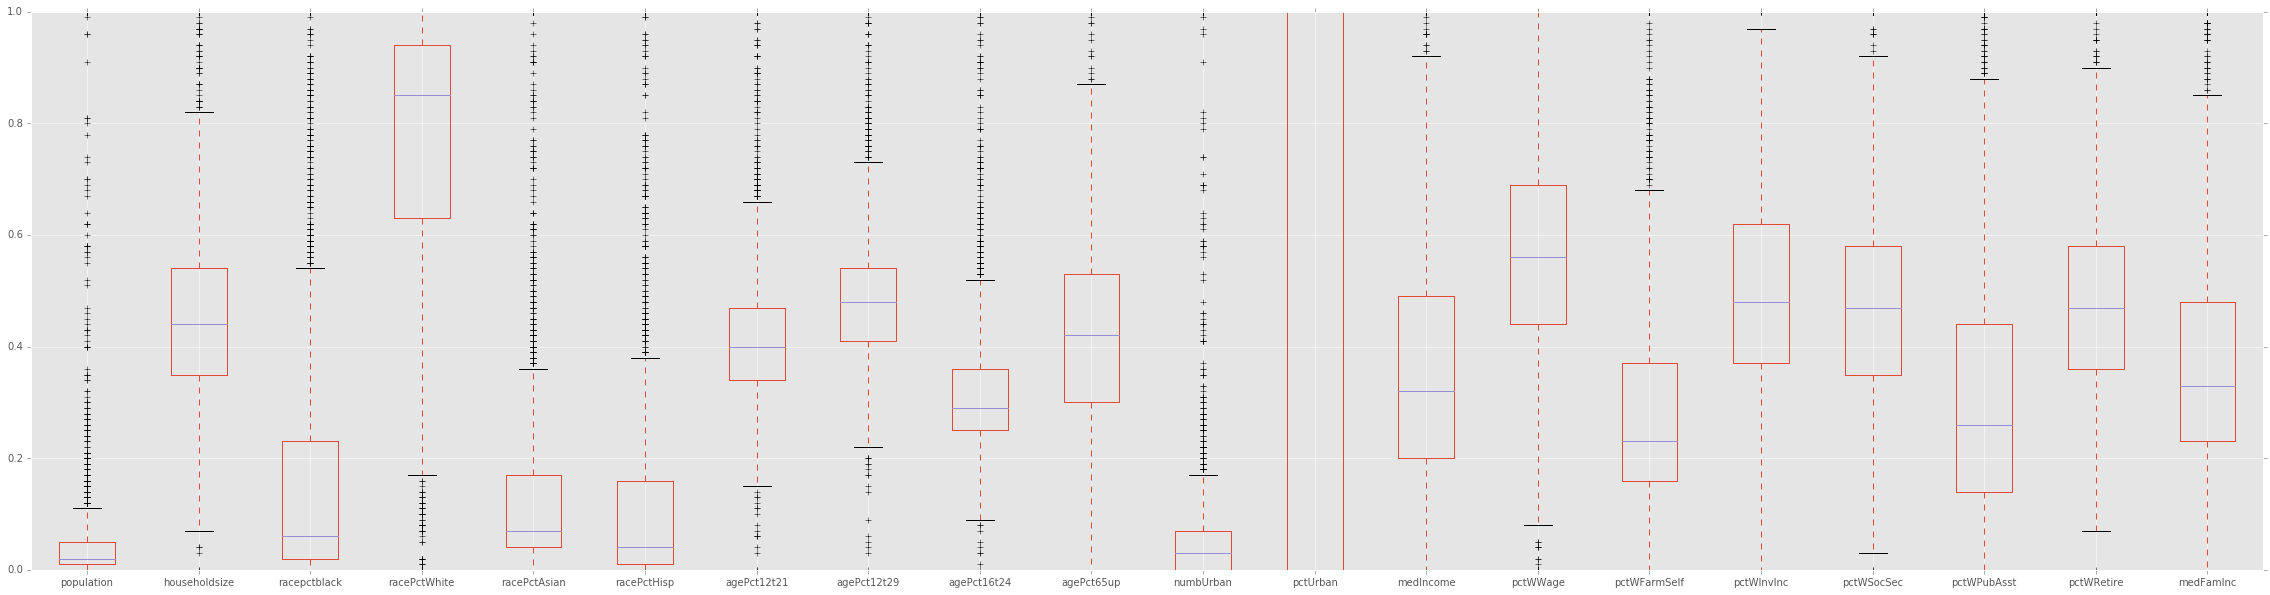

In [33]:
dataContinuous.ix[:,0:20].plot.box(vert=True, figsize=(40, 10))

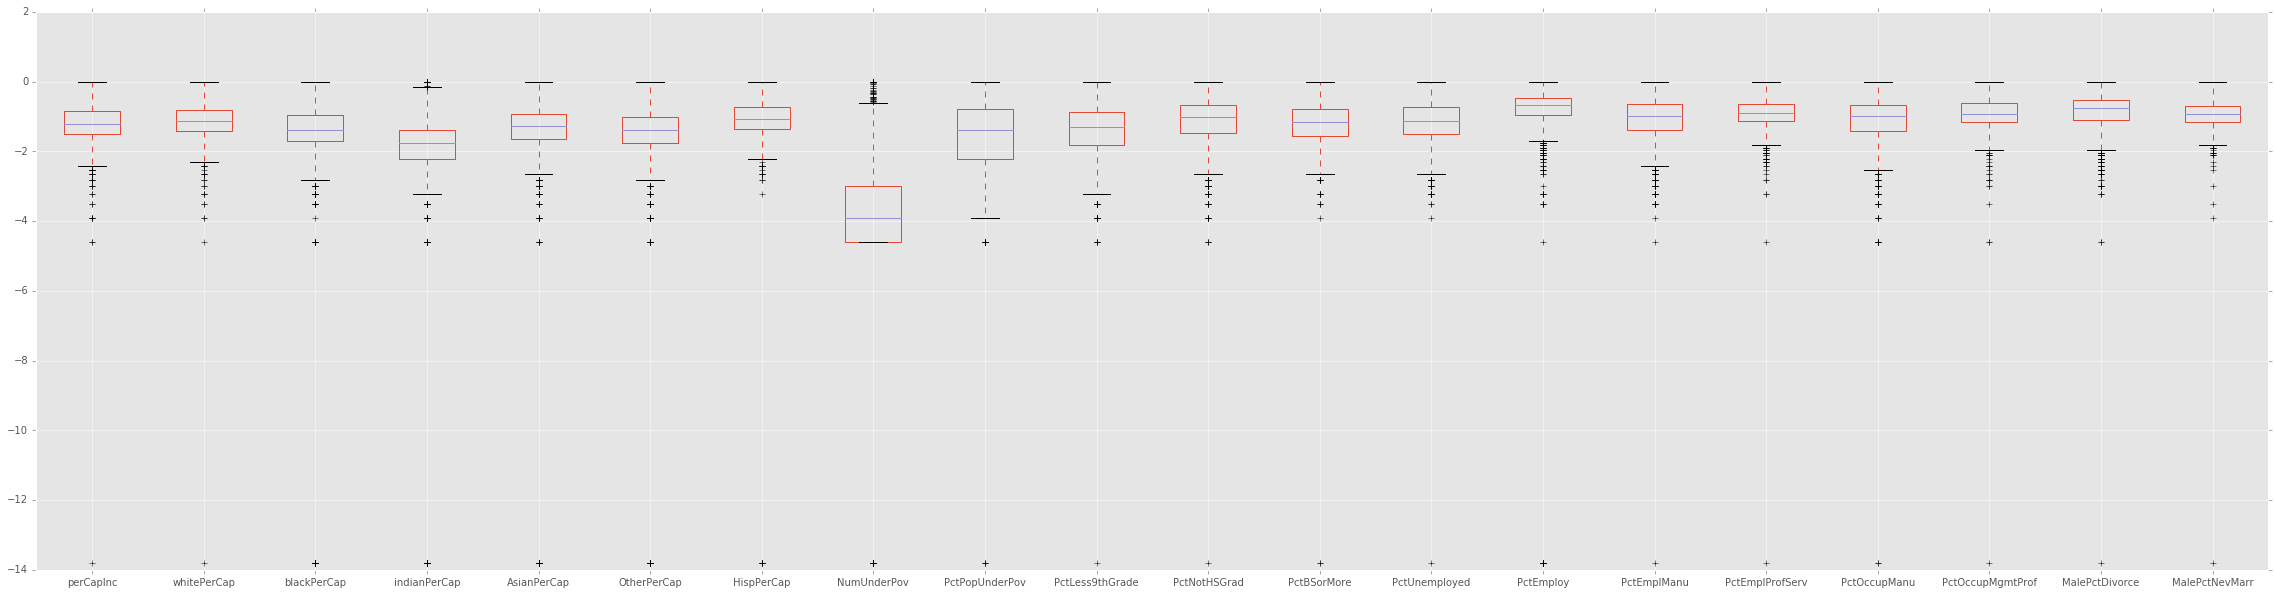

In [57]:
# Doing Log Transformation:
np.log(dataContinuous.ix[:,20:40] + 0.000001).plot.box(vert=True, figsize=(40, 10))

In [56]:
transformedData.head()

,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr
0,-1.237871,-1.237871,-1.309330,-1.832575,-1.427112,-0.967581,-1.347070,-4.605070,-1.966106e+00,-1.309330,-0.994250,-0.941606,-2.120255,-0.371062,-1.309330e+00,-9.942496e-01,-1.139431,-0.733967,-1.171180,-1.609433e+00
1,-1.514123,-1.237871,-1.897113,-13.815511,-1.237871,-13.815511,-1.966106,-3.911973,-7.985055e-01,-0.562117,-0.356674,-1.560643,-1.309330,-0.843968,9.999995e-07,-1.771951e+00,-0.072570,-1.427112,-0.867498,-1.139431e+00
2,-1.560643,-1.049819,-1.897113,-1.347070,-1.714793,-0.174352,-1.108660,-2.813394,-4.307814e-01,-0.733967,-0.544725,-1.272962,-0.235721,-1.514123,-8.209783e-01,-8.439677e-01,-0.616184,-0.891596,-0.371062,-1.021648e+00
3,-1.309330,-1.203969,-1.714793,-1.660726,-1.609433,-13.815511,-0.223142,-3.911973,-9.675814e-01,-0.673343,-0.527631,-1.139431,-0.994250,-0.843968,-4.462855e-01,-1.203969e+00,-0.653925,-0.776527,-0.755020,-1.171180e+00
4,-1.771951,-1.660726,-1.832575,-2.659246,-1.560643,-1.966106,-1.514123,-2.207266,9.999995e-07,-1.714793,-1.714793,-0.198450,-0.867498,-1.469672,-1.660726e+00,9.999995e-07,-1.386290,-0.400476,-2.407934,9.999995e-07


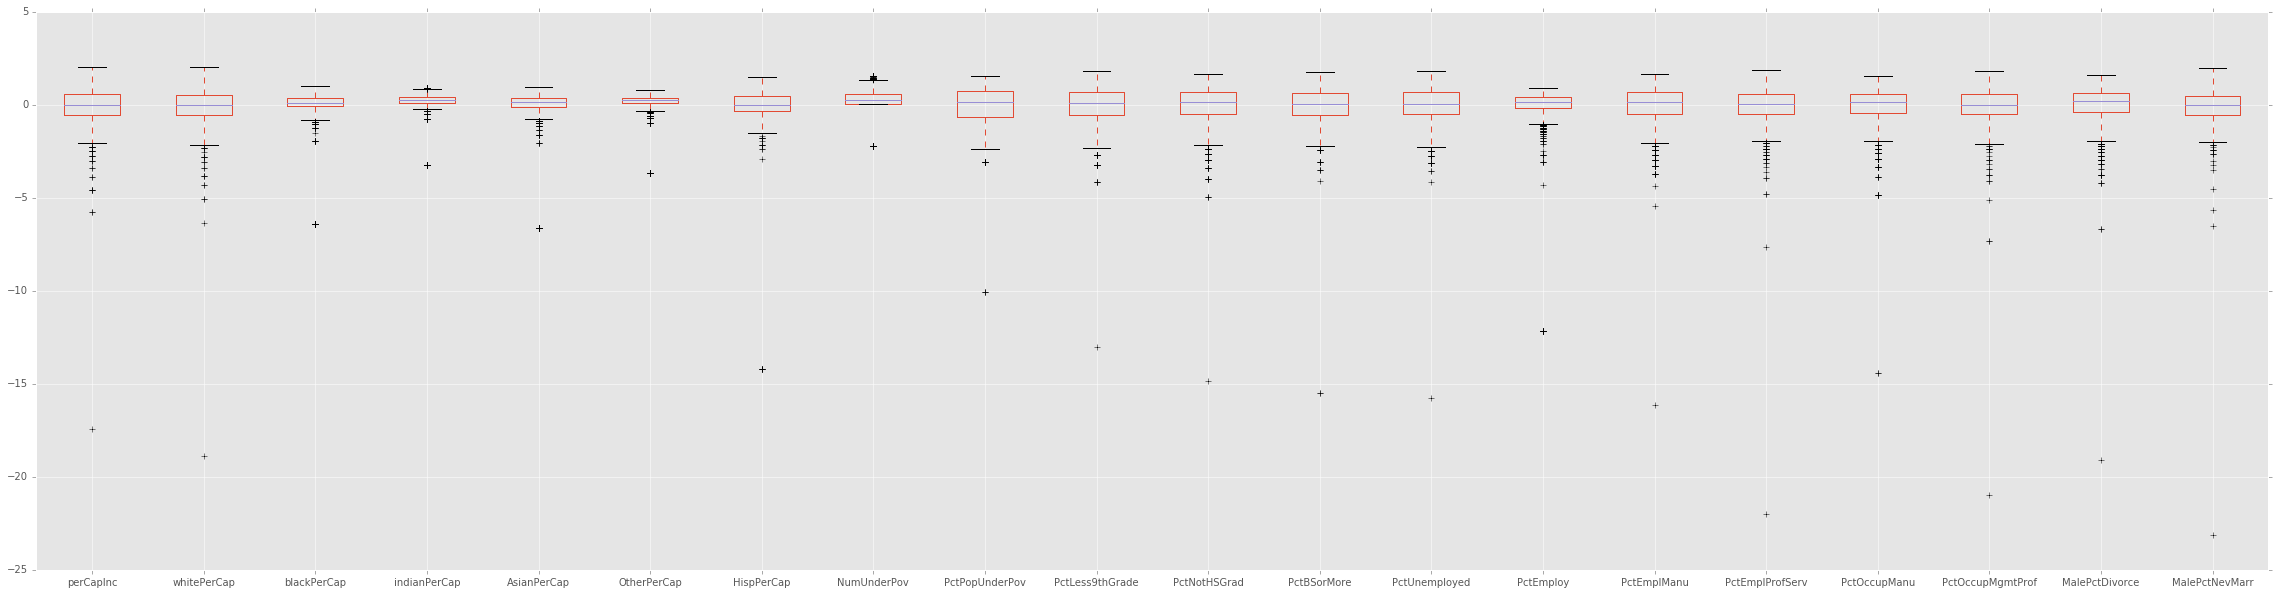

In [62]:
from sklearn.preprocessing import StandardScaler
dataTransformed = np.log(dataContinuous + 0.00001)  # Add a small amount of noise to avoid log(0)
scallerSTD = StandardScaler()
dataScaled = scallerSTD.fit_transform(dataTransformed)
dataScaled = pd.DataFrame(dataScaled, columns=dataContinuous.columns)
# scaledData.plot.box(vert=True, figsize=(40, 10))
dataScaled.ix[:,20:40].plot.box(vert=True, figsize=(40, 10))

In [74]:
targetContinuous = crimeDF[regTargetVar]

targetTransformed = np.log(targetContinuous + 0.00001)  # Add a small amount of noise to avoid log(0)
scallerSTD = StandardScaler()
targetScaled = scallerSTD.fit_transform(targetTransformed)
targetScaled = pd.DataFrame(targetScaled, columns=targetContinuous.columns)
targetScaled.head()

,ViolentCrimesPerPop
0,-0.665290
1,0.005554
2,1.562340
3,0.398627
4,0.060181


In [95]:
from sklearn.linear_model import RidgeCV

alpha = np.array([100,10, 1, 0.1, 0.01, 0.001], dtype='float64')   # 100,10, 1, 0.1, 0.01, 0.001

classifierRR_cv = RidgeCV(alpha, cv=cv)

classifierRR_cv = classifierRR_cv.fit(dataScaled, targetScaled)
predictionContinuousRR_cv = classifierRR_cv.predict(dataScaled)
# print (predictContinuous)

mseRR_Best = metrics.mean_squared_error(targetScaled, predictionContinuousRR_cv)
alpha_Best = classifierRR_cv.alpha_
print ('The MSE for the best model based on cross validation is (%s) and the corresponding norm co-efficient alpha is: '%str(mseRR_Best), alpha_Best)

The MSE for the best model based on cross validation is (0.430933258646) and the corresponding norm co-efficient alpha is:  0.1


In [89]:
from sklearn.linear_model import RidgeCV

alpha = np.array([50,10, 1, 0.1, 0.01, 0.001], dtype='float64')

classifierRR_cv = RidgeCV(alpha, cv=cv)

classifierRR_cv = classifierRR_cv.fit(dataScaled, targetContinuous)
predictionContinuousRR_cv = classifierRR_cv.predict(dataScaled)
# print (predictContinuous)

mseRR_Best = metrics.mean_squared_error(targetContinuous, predictionContinuousRR_cv)
alpha_Best = classifierRR_cv.alpha_
print ('The MSE for the best model based on cross validation is (%s) and the corresponding norm co-efficient alpha is: '%str(mseRR_Best), alpha_Best)

The MSE for the best model based on cross validation is (0.0197610792858) and the corresponding norm co-efficient alpha is:  50.0


In [ ]:
0.019507038311